# GMM: Limitations

The GMM is a generative model that assumes that data is drawn from Gaussian distributions. Thus, multiple clusters in a dataset are generated by multiple Gaussian distributions.

However, if the assumption is not met, i.e., if data is not drawn from Gaussian distributions, then GMM **fails to identify the cluster** of distributions.

In this notebook we study the limitations of the GMM clustering algorithm.

We give at least **two limitations** of GMM.

- Limitation 1: GMM performs poorly on non-Gaussian datasets.

- Limitation 2: When clusters do not have even sizes, there is a high chance that small clusters get dominated by the larger ones. 

In this notebook we demonstrate the first limitation, i.e., GMM fails to cluster non-Gaussian data.

We study two cases of a non-Gaussian dataset:
- Case 1: The number of clusters is known
- Case 2: The number of clusters is unknown

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


from sklearn.datasets.samples_generator import make_circles
from sklearn.mixture import GaussianMixture

# Synthetic Dataset

To create non-gaussian clusters we use Scikit-Learn's "datasets.make_circles" function.

It creates a large circle containing a smaller circle in 2D.

The following two parameters are used by the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Create Non-Gaussian Clusters and Visualiize 

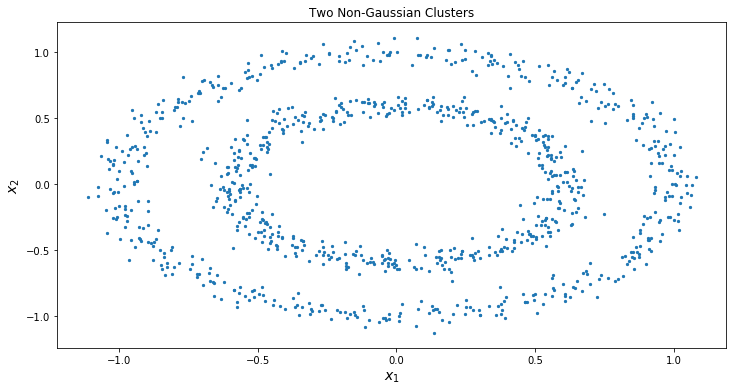

In [2]:
X, y = make_circles(1000, factor=0.6, noise=0.05)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')
plt.title("Two Non-Gaussian Clusters")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

## Case 1: The Number of Clusters is Known

Since we have two clusters in the non-Gaussian dataset, we set k = 2 in the GMM model.

Our goal is to see whether GMM is able to identify these two clusters.

In [3]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

## Plot the Clusters

We create three types of plot to display the quality of the clusters revealed by the GMM model.

- Color-coded data points in which cluster-membership is represented by colors
- Show decision-boundary between different clusters
- Show the density regions of the clusters

## Plot the Clusters Using Color-Coded Data Points

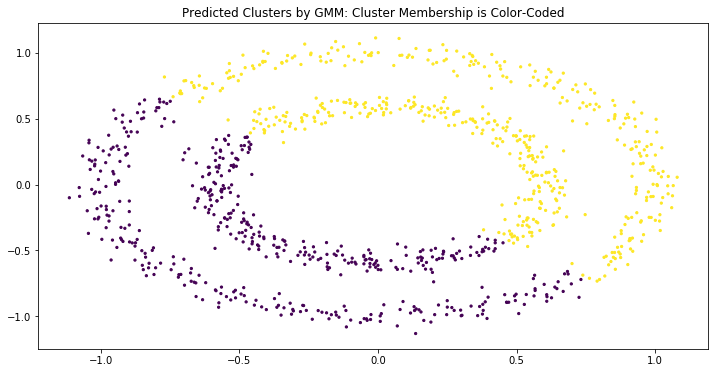

In [4]:
labels = gmm.predict(X)

plt.figure(figsize=(12, 6))
plt.title("Predicted Clusters by GMM: Cluster Membership is Color-Coded")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

## Plot Decision Boundary 


To visualize the inter-cluster decision boundary following functions are used. 

In [5]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

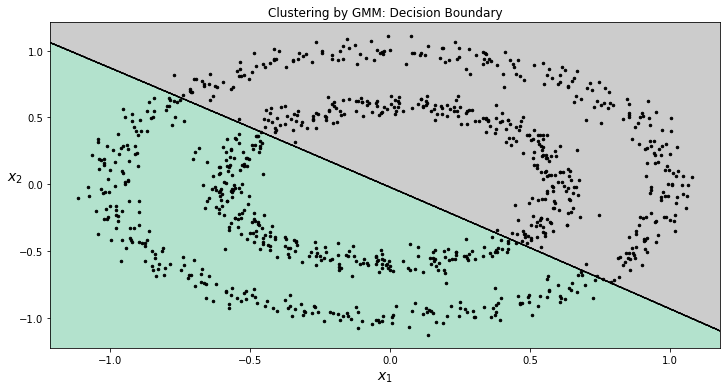

In [6]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by GMM: Decision Boundary")
plot_decision_boundaries(gmm, X, show_centroids=False)
plt.show()

## Plot the Clusters & Density Regions

To visualize the density contours created by the GMM model, we use the following functions. 

It also shows the cluster means and the decision boundaries (using dashed lines).

In [7]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


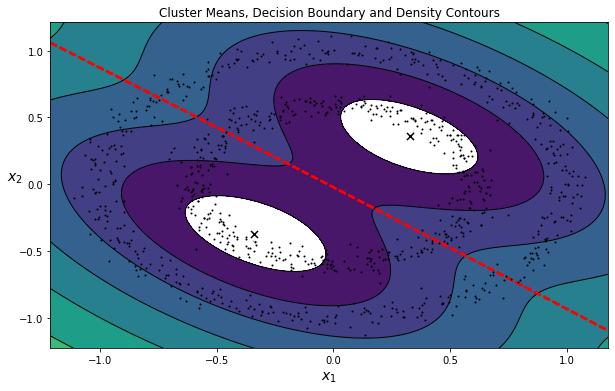

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Cluster Means, Decision Boundary and Density Contours")

plot_gaussian_mixture(gmm, X)

plt.show()

## Case 1: Observation

The GMM model is **unable to detect the two clusters** due to the non-Gaussian distribution of data.

## Case 2: The Number of Clusters is Unknown

Let's say that we don't know the distribution of the data. I.e., we don't know that there are two clusters.

Our goal is to see whether the GMM model could reveal the number of clusters by using **theoretical information criterion**, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).

We train the GMM model with various values of $k$ and measure their BIC & AIC. 

The AIC seems to decrease continuously. Thus, we use BIC to choose a model.

The minimum BIC indicates that there are 14 clusters, instead of 2. This is **clearly incorrect**.

This happened because those 14 clusters will have Gaussian distribution that matches the underlying assumption of GMM.

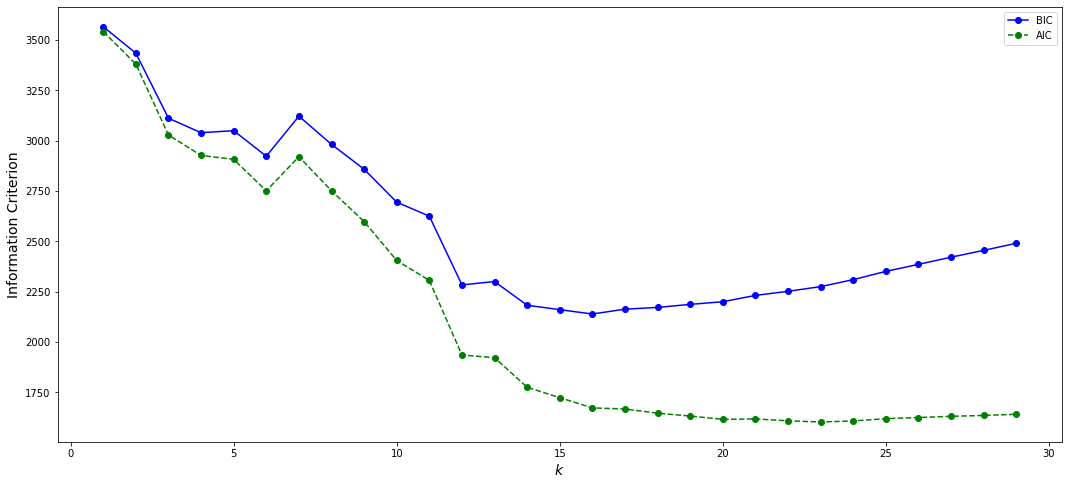

In [9]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 30)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(18, 8))
plt.plot(range(1, 30), bics, "bo-", label="BIC")
plt.plot(range(1, 30), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.legend()

plt.show()

## Train a Model using the Optimal $k$ Obtained from the Lowest BIC

We are curious to see the quality of the clustering obtained from a GMM model trained using optimal $k$ from the lowest BIC.

In [10]:
gmm2 = GaussianMixture(n_components=14, n_init=10, random_state=42)
gmm2.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=14, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

## Density Plot of the Predicted Clusters

/Users/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Log scale: values of z <= 0 have been masked
/Users/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Log scale: values of z <= 0 have been masked


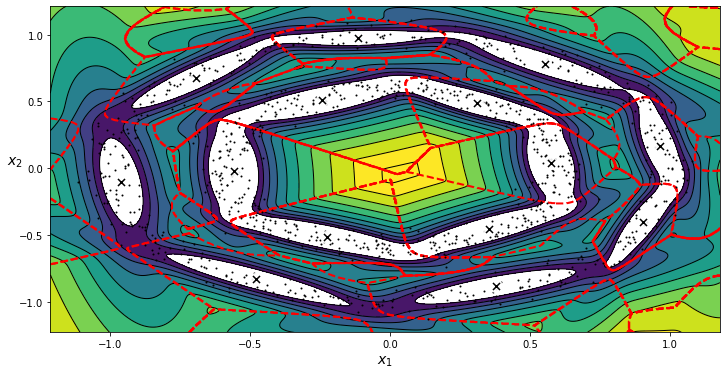

In [11]:
plt.figure(figsize=(12, 6))

plot_gaussian_mixture(gmm2, X)

plt.show()

## Observation From the Density Plot

We see from the density plot that although the GMM model created 14 clusters, there are only **two high-density regions**. These two regions corresponds to the two clusters of points from the original dataset. The likelihood of the data is largest in these two regions.

Thus, although the GMM model failed to discover the clustering structure of the dataset, it is able to discover the high-density regions (when an optimal $k$ was used).

This observation is useful for anomaly detection. Because any instance outside these two high-density regions could be considered as anomalies.

## Final Observation

Finally, we see that although the dataset contains two distinct non-Gaussian clusters, the GMM model is unable to identify those.

In a future notebook we will see that the **Density-based spatial clustering of applications with noise (DBSCAN)** clustering method is able to identify clusters of arbitrary shape (e.g., non-Gaussian).